* https://www.springboard.com/workshops/ucsd-machine-learning-engineering-bootcamp/learn#/curriculum/26454
* https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
* https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/bonus%20content/feature%20engineering%20text%20data

## Traditional Methods for Text Data

Traditional strategies for taming unstructured, textual data

* Understanding Text Data
* Feature Engineering Strategies
* Text pre-processing
* Bag of Words Model
* Bag of N-Grams Model
* TF-IDF Model
* Document Similarity
* Document Clustering with Similarity Features
* Topic Models
* Document Clustering with Topic Model Features
* Future Scope for Advanced Strategies

### Understanding Text Data

### Feature Engineering Strategies

Let’s look at some popular and effective strategies for handling text data and extracting meaningful features from the same which can be used in downstream machine learning systems.

We’ll start by loading up some basic dependencies and settings.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

Let’s now take a sample corpus of documents on which we will run most of our analyses in this article.

A **corpus** is typically a collection of text documents usually belonging to one or more subjects.

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Text pre-processing

There can be multiple ways of cleaning and pre-processing textual data. In the following points, we highlight some of the most important ones which are used heavily in Natural Language Processing (NLP) pipelines.

* **Removing tags**: Our text often contains unnecessary content like HTML tags, which do not add much value when analyzing text. The BeautifulSoup library does an excellent job in providing necessary functions for this.
* **Removing accented characters**: In any text corpus, especially if you are dealing with the English language, often you might be dealing with accented characters\letters. Hence we need to make sure that these characters are converted and standardized into ASCII characters. A simple example would be converting é to e.
* **Expanding contractions**: In the English language, contractions are basically shortened versions of words or syllables. These shortened versions of existing words or phrases are created by removing specific letters and sounds. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form often helps with text standardization.
* **Removing special characters**: Special characters and symbols which are usually non alphanumeric characters often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.
* **Stemming and lemmatization**: Word stems are usually the base form of possible words that can be created by attaching affixes like prefixes and suffixes to the stem to create new words. This is known as inflection. The reverse process of obtaining the base form of a word is known as stemming. A simple example are the words WATCHES, WATCHING, and WATCHED. They have the word root stem WATCH as the base form. Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However the base form in this case is known as the root word but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary) but the root stem may not be so.
* **Removing stopwords**: Words which have little or no significance especially when constructing meaningful features from text are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Words like **a**, **an**, **the**, and so on are considered to be stopwords. There is no universal stopword list but we use a standard English language stopwords list from nltk. You can also add your own domain specific stopwords as needed.

Besides this you can also do other standard operations like tokenization, removing extra whitespaces, text lower casing and more advanced operations like spelling corrections, grammatical error corrections, removing repeated characters and so on.

Since the focus of this article is on feature engineering, we will build a simple text pre-processor which focuses on removing special characters, extra whitespaces, digits, stopwords and lower casing the text corpus.

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

Once we have our basic pre-processing pipeline ready, let’s apply the same to our sample corpus.

In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

The above output should give you a clear view of how each of our sample documents look like after pre-processing.

#### ***Let’s engineer some features now:***

### Bag of Words Model

This is perhaps the most simple vector space representational model for unstructured text.

A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute.

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values.

The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

Thus you can see that our documents have been converted into numeric vectors such that each document is represented by one vector (row) in the above feature matrix.

The following code will help represent this in a more easy to understand format:

In [8]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


Each **column** or dimension in the feature vectors represents a word from the corpus and each **row** represents one of our documents.

The value in any cell, represents the number of times that word (represented by column) occurs in the specific document (represented by row).

Hence if a corpus of documents consists of N unique words across all the documents, we would have an N-dimensional vector for each of the documents.

### Bag of N-Grams Model

A word is just a single token, often known as a unigram or 1-gram.

We already know that the Bag of Words model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of words which occur in a sequence?

**N-grams** help us achieve that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence.

Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on.

The **Bag of N-Grams model** is hence just an extension of the Bag of Words model so we can also leverage N-gram based features.

The following example depicts bi-gram based features in each document feature vector:

In [10]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


This gives us feature vectors for our documents, where each feature consists of a bi-gram representing a sequence of two words and values represent how many times the bi-gram was present for our documents.

### TF-IDF Model

There are some **potential problems** which might arise with the **Bag of Words** model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set.

The **TF-IDF** model tries to combat this issue by using a scaling or normalizing factor in its computation. TF-IDF stands for **Term Frequency-Inverse Document Frequency**, which uses a combination of two metrics in
its computation, namely: **term frequency (tf)** and **inverse document frequency (idf)**.

This technique was developed for ranking results for queries in search engines and now it is an indispensable model in the world of information retrieval and NLP.

Mathematically, we can define TF-IDF as tfidf = tf x idf, which can be expanded further to be represented as follows:
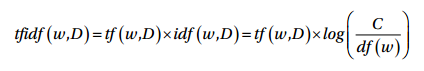
Here, ***tfidf(w, D)*** is the TF-IDF score for word ***w*** in document ***D***. The term ***tf(w, D)*** represents the **term frequency** of the word ***w*** in document ***D***, which can be obtained from the Bag of Words model.

The term ***idf(w, D)*** is the **inverse document frequency** for the term ***w***, which can be computed as the **log transform** of the total number of documents in the corpus ***C** divided by the document frequency of the word ***w***, which is basically the frequency of documents in the corpus where the word ***w*** occurs.

There are multiple variants of this model but they all end up giving quite similar results.

Let’s apply this on our corpus:

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


The **TF-IDF** based feature vectors for each of our text documents show ***scaled*** and ***normalized*** values as compared to the raw Bag of Words model values. 

### Document Similarity

Document similarity is the process of using a **distance** or **similarity based metric** that can be used to identify how similar a text document is with any other document(s) **based on features extracted from the documents like bag of words or tf-idf**.

Thus you can see that we can **build on top of the tf-idf based features we engineered** in the previous section and use them to generate new features which can be useful in domains like search engines, document clustering and information retrieval by leveraging these similarity based features.
___

Pairwise document similarity in a corpus involves computing document similarity for **each pair of documents** in a corpus.

Thus if you have C documents in a corpus, you would end up with a ***C x C*** matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively.

There are several **similarity and distance metrics** that are used to compute document similarity. These include cosine distance/similarity, euclidean distance, manhattan distance, BM25 similarity, jaccard distance and so on.

In our analysis, we will be using perhaps the most popular and widely used similarity metric, **cosine similarity** and **compare pairwise document similarity** based on their **TF-IDF feature vectors**.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df
# Pairwise document similarity matrix (cosine similarity)

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


**Cosine similarity** basically gives us a metric representing the **cosine of the angle** between the feature vector representations of two text documents.

The lower the angle between the documents, the closer and more similar they are as depicted in the following figure:
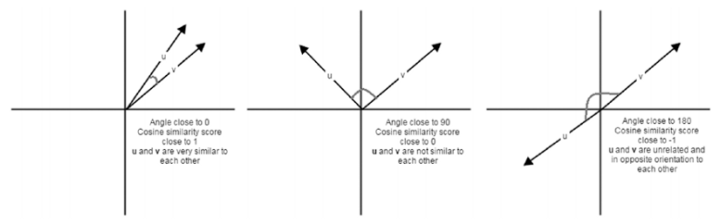
`Cosine similarity depictions for text document feature vectors`

Looking closely at the similarity matrix clearly tells us that documents `(0, 1 and 6)`, `(2, 5 and 7)` are very similar to one another and documents `3` and `4` are slightly similar to each other but the magnitude is not very strong, however still stronger than the other documents.

This must indicate these similar documents have some similar features. This is a perfect example of **grouping** or **clustering** that can be solved by unsupervised learning especially when you are dealing with huge corpora of millions of text documents.

### Document Clustering with Similarity Features

**Clustering** leverages **unsupervised learning** to group data points (documents in this scenario) into groups or clusters.

We will be leveraging an **unsupervised hierarchical clustering algorithm** here to try and group similar documents from our toy corpus together by leveraging the document similarity features we generated earlier.

There are two types of hierarchical clustering algorithms namely, **agglomerative** and **divisive methods**.

**We will be using a agglomerative clustering algorithm**, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion.

A sample depiction is shown in the following figure:
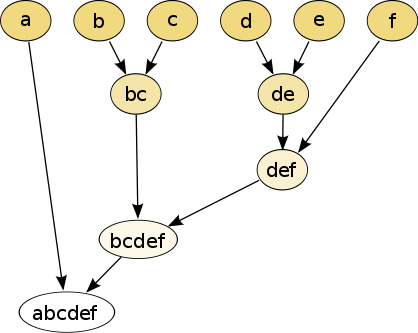
`Agglomerative Hierarchical Clustering`

The selection of the **linkage criterion** governs the **merge strategy**.

Some examples of **linkage criteria** are **Ward**, **Complete linkage**, **Average linkage** and so on.

This criterion is very useful for choosing the **pair of clusters** (individual documents at the lowest step and clusters in higher steps) to **merge** at each step based on the optimal value of an objective function.

We choose the **Ward’s minimum variance** method as our linkage criterion to **minimize total within-cluster variance**.

Hence, at each step, we find the pair of clusters that leads to minimum increase in total within-cluster variance after merging.

Since we already have our similarity features, let’s build out the linkage matrix on our sample documents:

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2.0,7.0,0.253098,2.0
1,0.0,6.0,0.308539,2.0
2,5.0,8.0,0.386952,3.0
3,1.0,9.0,0.489845,3.0
4,3.0,4.0,0.732945,2.0
5,11.0,12.0,2.695647,5.0
6,10.0,13.0,3.451082,8.0


If you closely look at the linkage matrix, you can see that **each step (row) of the linkage matrix tells us which data points (or clusters) were merged together**.

If you have ***n*** data points, the linkage matrix, ***Z*** will be having a shape of ***(n — 1) x 4*** where ***Z[i]*** will tell us which clusters were merged at step ***i***.

Each row has four elements:
* The **first two elements** are either data point identifiers or cluster labels (in the later parts of the matrix once multiple data points are merged),
* The **third element** is the cluster distance between the first two elements (either data points or clusters)
* The **last element** is the total number of elements\data points in the cluster once the merge is complete.

We recommend you refer to the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), which explains this in detail.

Let’s now visualize this matrix as a **dendrogram** to understand the elements better:

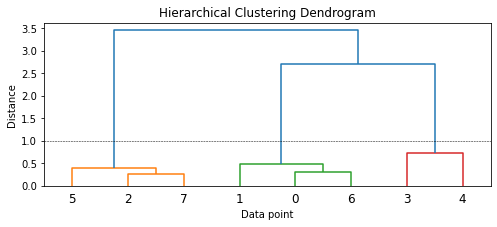

In [15]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

We can see how each data point starts as an individual cluster and slowly starts getting merged with other data points to form clusters.

On a high level from the colors and the dendrogram, you can see that the model has correctly identified three major clusters if you consider a distance metric of around 1.0 or above (denoted by the dotted line).

Leveraging this distance, we get our cluster labels.

In [16]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


Thus you can clearly see our algorithm has correctly identified the three distinct categories in our documents based on the cluster labels assigned to them.

This should give you a good idea of how our **TF-IDF features were leveraged** to build our similarity features which in turn helped in clustering our documents.

You can use this pipeline in the future for clustering your own documents.

### Topic Models

We can also use some **summarization techniques** to extract **topic** or **concept based** features from text documents.

The idea of **topic models** revolves around the process of extracting **key themes** or **concepts** from a corpus of documents which are represented as topics.

Each topic can be represented as a **bag or collection of words/terms** from the document corpus.

Together, these terms signify a specific topic, theme or a concept and each topic can be easily distinguished from other topics by virtue of the semantic meaning conveyed by these terms.

However often you do end up with overlapping topics based on the data. These concepts can range from simple facts and statements to opinions and outlook.

Topic models are extremely useful in summarizing large corpus of text documents to extract and depict key concepts.

They are also useful in extracting features from text data that capture latent patterns in the data.

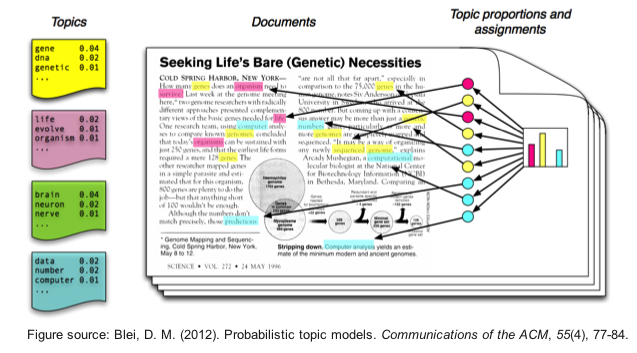
`An example of topic models`

There are various techniques for topic modeling and most of them involve some form of matrix decomposition.

Some techniques like **Latent Semantic Indexing (LSI)** use matrix decomposition operations, more specifically **Singular Valued Decomposition**.

We will be using another technique **Latent Dirichlet Allocation (LDA)**, which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic.

This is similar to pLSI based model (probabilistic LSI). Each latent topic contains a Dirichlet prior over them in the case of LDA.

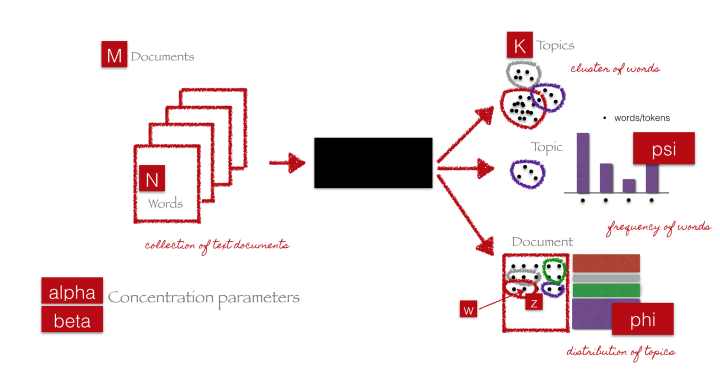
`End-to-end LDA framework (courtesy of C. Doig, Introduction to Topic
Modeling in Python)`

The black box in the above figure represents the core algorithm that makes use of the previously mentioned parameters to extract **K** topics from **M** documents. The following steps give a simplistic explanation of what happens in the algorithm behind the scenes.
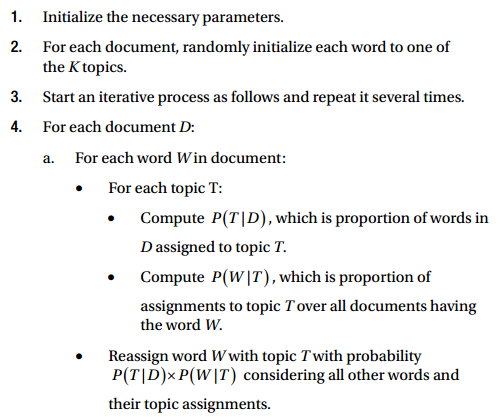

Once this runs for several iterations, we should have topic mixtures for each document and then generate the constituents of each topic from the terms that point to that topic. Frameworks like `gensim` or `scikit-learn` enable us to leverage the LDA model for generating topics.

For the purpose of feature engineering which is the intent of this article, you need to remember that **when LDA is applied on a document-term matrix (TF-IDF or Bag of Words feature matrix), it gets decomposed into two main components**:
* A document-topic matrix, which would be the feature matrix we are looking for.
* A topic-term matrix, which helps us in looking at potential topics in the corpus.

Let’s leverage scikit-learn to get the document-topic matrix as follows:

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


You can clearly see which documents contribute the most to which of the three topics in the above output.

You can view the topics and their main constituents as follows:

In [19]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138985), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]



Thus you can clearly see the three topics are quite distinguishable from each other based on their constituent terms:
* first one talking about weather
* second one about food
* the last one about animals.

Choosing the number of topics for topic modeling is an art as well as a science.

There are various methods and heuristics to get the optimal number of topics but due to the detailed nature of these techniques, we don’t discuss them here.

### Document Clustering with Topic Model Features

We used our **Bag of Words model based features** to build out topic model based features using **LDA**. We can now actually leverage the document term matrix we obtained and use an **unsupervised clustering algorithm** to try and group our documents similar to what we did earlier with our similarity features.

We will use a very popular partition based clustering method this time, **K-means clustering** to cluster or group these documents based on their topic model feature representations.

In **K-means clustering**, we have an input parameter ***k***, which specifies the number of clusters it will output using the document features.

This clustering method is a **centroid based clustering method**, where it tries to cluster these documents into clusters of equal variance.

It tries to create these clusters by minimizing the within-cluster sum of squares measure, also known as **inertia**.

There are multiple ways to select the optimal value of ***k*** like using the **Sum of Squared Errors metric**, **Silhouette Coefficients** and the **Elbow method**.

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


### Future Scope for Advanced Strategies